In [ ]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from Bio import PDB

In [ ]:
cif_file = "/home/fh2268/comp-lab-class-2024/Week7-Alphafold/Input/2btf_actin/actin_atp_mg2/fold_2024_10_17_14_21_actin_atp_mg2_model_0.cif"  # 替换为你的 CIF 文件路径
pdb_file = "/home/fh2268/comp-lab-class-2024/Week7-Alphafold/Input/2btf_actin/actin_atp_mg2/fold_2024_10_17_14_21_actin_atp_mg2_model_0.pdb"

parser = PDB.MMCIFParser(QUIET=True)
structure = parser.get_structure("actin", cif_file)

io = PDB.PDBIO()
io.set_structure(structure)
io.save(pdb_file)

In [2]:
af2_path = "/home/fh2268/comp-lab-class-2024/Week7-Alphafold/Input/2btf_actin/2btf_af2/2btf_923b1_unrelaxed_rank_001_alphafold2_multimer_v3_model_1_seed_000.pdb"
af3_path = "/home/fh2268/comp-lab-class-2024/Week7-Alphafold/Input/2btf_actin/actin_atp_mg2/fold_2024_10_17_14_21_actin_atp_mg2_model_0.pdb"

af2 = mda.Universe(af2_path) 
af3 = mda.Universe(af3_path) 

af2_protein = af2.select_atoms('protein and segid A')
af3_protein = af3.select_atoms('protein and segid A')

In [12]:
alignment = mda.analysis.align.AlignTraj(af3, af2, select="name CA and segid A", in_memory=True).run()


af2_ca = af2_protein.select_atoms('name CA')
af3_ca = af3_protein.select_atoms('name CA')

distances = np.linalg.norm(af2_ca.positions - af3_ca.positions, axis=1)

residue_numbers = np.arange(1, len(distances) + 1)

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/core/universe.py:641: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


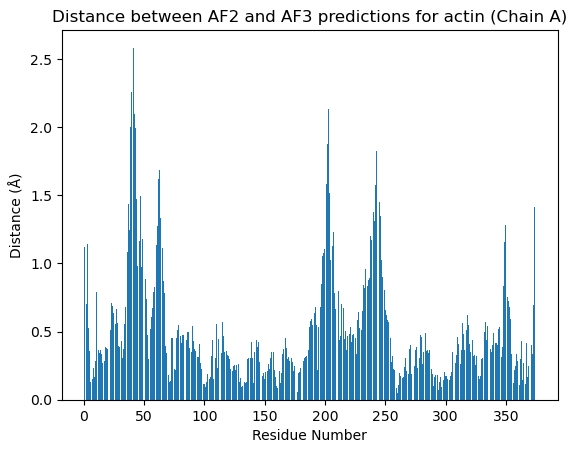

In [13]:
plt.bar(residue_numbers, distances)
plt.xlabel('Residue Number')
plt.ylabel('Distance (Å)')
plt.title('Distance between AF2 and AF3 predictions for actin (Chain A)')
plt.show()